In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from urllib.request import urlretrieve
from gsheets import Sheets

In [26]:
Seat_Matrix = dict()
Seat_Matrix['IPRC'] = 1
Seat_Matrix['ISTRAC'] = 6
Seat_Matrix['NRSC'] = 2
Seat_Matrix['LPSC'] = 1
Seat_Matrix['MCF'] = 1
Seat_Matrix['PRL'] = 2
Seat_Matrix['SAC'] = 3
Seat_Matrix['SCL'] = 2
Seat_Matrix['SDSC'] = 5
Seat_Matrix['URSC'] = 5
Seat_Matrix['VSSC'] = 5

HSP_included = False

max_rank = 34
if HSP_included:
    max_rank = 38
    Seat_Matrix['HSP'] = 4

centers = Seat_Matrix.keys()

In [27]:
df = pd.read_csv('Responses.csv')
print(df.columns)
len(df)

rank_name = dict()
ranks = pd.read_csv('ISRORanks.csv')
for i in range(len(ranks)):
    rank_name[ranks['Rank'][i]] = ranks['Name'][i] 

Index(['Timestamp', 'Name', 'Student Code(Last Three Digits)', 'Rank',
       'Preference order [IPRC]', 'Preference order [ISTRAC]',
       'Preference order [LPSC]', 'Preference order [MCF]',
       'Preference order [NRSC]', 'Preference order [PRL]',
       'Preference order [SAC]', 'Preference order [SCL]',
       'Preference order [SDSC]', 'Preference order [URSC]',
       'Preference order [VSSC]', 'Email Address'],
      dtype='object')


In [28]:
data = dict()
for i in range(len(df)):
    data[df['Rank'][i]] = dict()
    data[df['Rank'][i]]['Name'] = df['Name'][i]
    data[df['Rank'][i]]['Preferences'] = []
    for j in range(11):
        for center in centers:
            if df['Preference order ['+center+']'][i] == j+1:
                data[df['Rank'][i]]['Preferences'].append(center)
                continue

********************MOCK Allocation Results********************
Allocating 2 rank , Debajyoti Chakrabarti => URSC (Preference Number : 1)
Allocating 3 rank , Srinika Selvam => URSC (Preference Number : 1)
Allocating 4 rank , Anuj Malik => URSC (Preference Number : 1)
Allocating 5 rank , Archana => VSSC (Preference Number : 1)
Allocating 6 rank , Himanshu Saini => SAC (Preference Number : 1)
Allocating 7 rank , Sneha Gem Matthew => VSSC (Preference Number : 1)
Allocating 8 rank , Chinmay S Mhatre => URSC (Preference Number : 1)
Allocating 9 rank , Sri Lakshmi Swetha Gomada => URSC (Preference Number : 1)
Allocating 10 rank , Kaninika Pant => SAC (Preference Number : 2)
Allocating 11 rank , Reuben Chacko Thomas => VSSC (Preference Number : 1)
Allocating 12 rank , Kaustubh Datar => PRL (Preference Number : 1)
Allocating 13 rank , Pragya Shah => SAC (Preference Number : 2)
Allocating 14 rank , Rohit Gandikota => NRSC (Preference Number : 3)
Allocating 15 rank , Suraj R => VSSC (Preference 

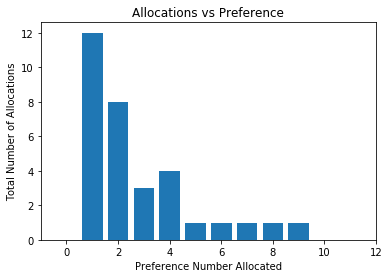

In [29]:
Seat_Matrix_CC = Seat_Matrix.copy()
hit_list = np.zeros(len(centers)+1)
Seat_Matrix_availability = dict()
for center in centers:
    Seat_Matrix_availability[center] = []
print('********************MOCK Allocation Results********************')
for rank in range(2,max_rank):
    if rank in data.keys():
        for center in centers:
            Seat_Matrix_availability[center].append(Seat_Matrix_CC[center])
        flag = True
        i=0
        while flag:
            if Seat_Matrix_CC[data[rank]['Preferences'][i]]!=0:
                print('Allocating %d rank '%(rank)+', '+rank_name[rank]+' => '+data[rank]['Preferences'][i]+' (Preference Number : %d)'%(i+1))
                data[rank]['Allocation'] = data[rank]['Preferences'][i]
                data[rank]['Choice_Number'] = i+1
                Seat_Matrix_CC[data[rank]['Preferences'][i]] -= 1
                flag = False
                hit_list[i+1]+=1
            i = i+1

data[max_rank] = dict()
for center in centers:
    if Seat_Matrix_CC[center]!=0:
        data[max_rank]['Allocation'] = center
        print('Allocating %d rank '%(max_rank)+', '+rank_name[max_rank]+' => '+data[max_rank]['Allocation']+' (Preference Number : **)')
        
plt.bar(range(12),hit_list)
plt.xlabel('Preference Number Allocated')
plt.ylabel('Total Number of Allocations')
plt.title('Allocations vs Preference')
plt.show()

In [30]:
df_out = dict()
df_out['Name'] = []
df_out['Rank'] = []
df_out['Allocation'] = []
for rank in range(2, max_rank):
    if rank in data.keys():
        df_out['Name'].append(data[rank]['Name'])
        df_out['Allocation'].append(data[rank]['Allocation'])
        df_out['Rank'].append(rank)
df_out = pd.DataFrame(df_out)
with open('Allocations.csv','w') as f:
    df_out.to_csv(f)

Average Preference - 1 being highest
URSC --> 1.9558823529411764
SAC --> 3.411764705882353
VSSC --> 4.102941176470588
ISTRAC --> 5.0
NRSC --> 5.5588235294117645
PRL --> 5.764705882352941
SDSC --> 6.264705882352941
SCL --> 6.617647058823529
LPSC --> 8.117647058823529
MCF --> 9.058823529411764
IPRC --> 10.147058823529411


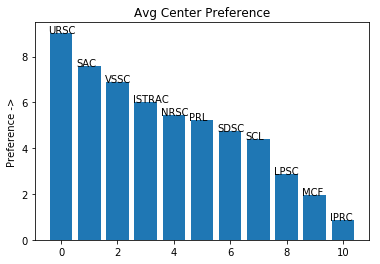

In [31]:
preference_stats = dict()
for center in centers:
    preference_stats[center] = 0

for i in range(len(df)):
    for center in centers:
        preference_stats[center] += df['Preference order ['+center+']'][i]
        
for center in centers:
    preference_stats[center] = preference_stats[center]/len(df) 

average_preference = sorted(preference_stats.items(), key = lambda kv:(kv[1], kv[0]))

plot_val = []
center_order = []
print('Average Preference - 1 being highest')
for i in range(len(average_preference)):
    print(average_preference[i][0]+' --> '+str(average_preference[i][1]))
    plot_val.append(11-average_preference[i][1])
    center_order.append(average_preference[i][0])
    
plt.figure()
plt.bar(range(11),plot_val)
for i in range(11):
    plt.annotate(center_order[i], (i-0.45, plot_val[i]))
    
plt.title('Avg Center Preference')
plt.ylabel('Preference ->')
plt.show()

In [32]:
pref_df = dict()
for i in range(2,max_rank):
    pref_df['Rank %d'%(i)] = data[i]['Preferences']

pref_df = pd.DataFrame(pref_df)
with open('Preferences_all.csv','w') as f:
    pref_df.to_csv(f)

In [33]:
sma_df = pd.DataFrame(Seat_Matrix_availability)
with open('SeatMatrixEvolve.csv','w') as f:
    sma_df.to_csv(f)

In [40]:
print('Allocations')
for center in centers:
    print(center)
    print('==================')
    for i in range(2,max_rank):
        if data[i]['Allocation'] is center:
            print(rank_name[i])
    print('==================')

Allocations
MCF
Deepshikha
SAC
Himanshu Saini
Kaninika Pant
Pragya Shah
VSSC
Archana
Sneha Gem Matthew
Reuben Chacko Thomas
Suraj R
Arnab Karmakar
PRL
Kaustubh Datar
Mohit Kumar Soni
IPRC
Rashmi
ISTRAC
Ansuman Palo
Sagnik Dutta
Boyapati Ujjwala
Sahal Mohammad
Divyang Arora
Raju Joarder
SDSC
Greeshma Battula
Sanidhya Vijaywat
Vamshi T. Bollam 
Neel Menpara
URSC
Debajyoti Chakrabarti
Srinika Selvam
Anuj Malik
Chinmay S Mhatre
Sri Lakshmi Swetha Gomada
NRSC
Rohit Gandikota
Samvram Sahu
SCL
Shubham Chauhan
Kamna Kohli
LPSC
Susmitha Suresh
